## 04数据操作  

* 切片规则
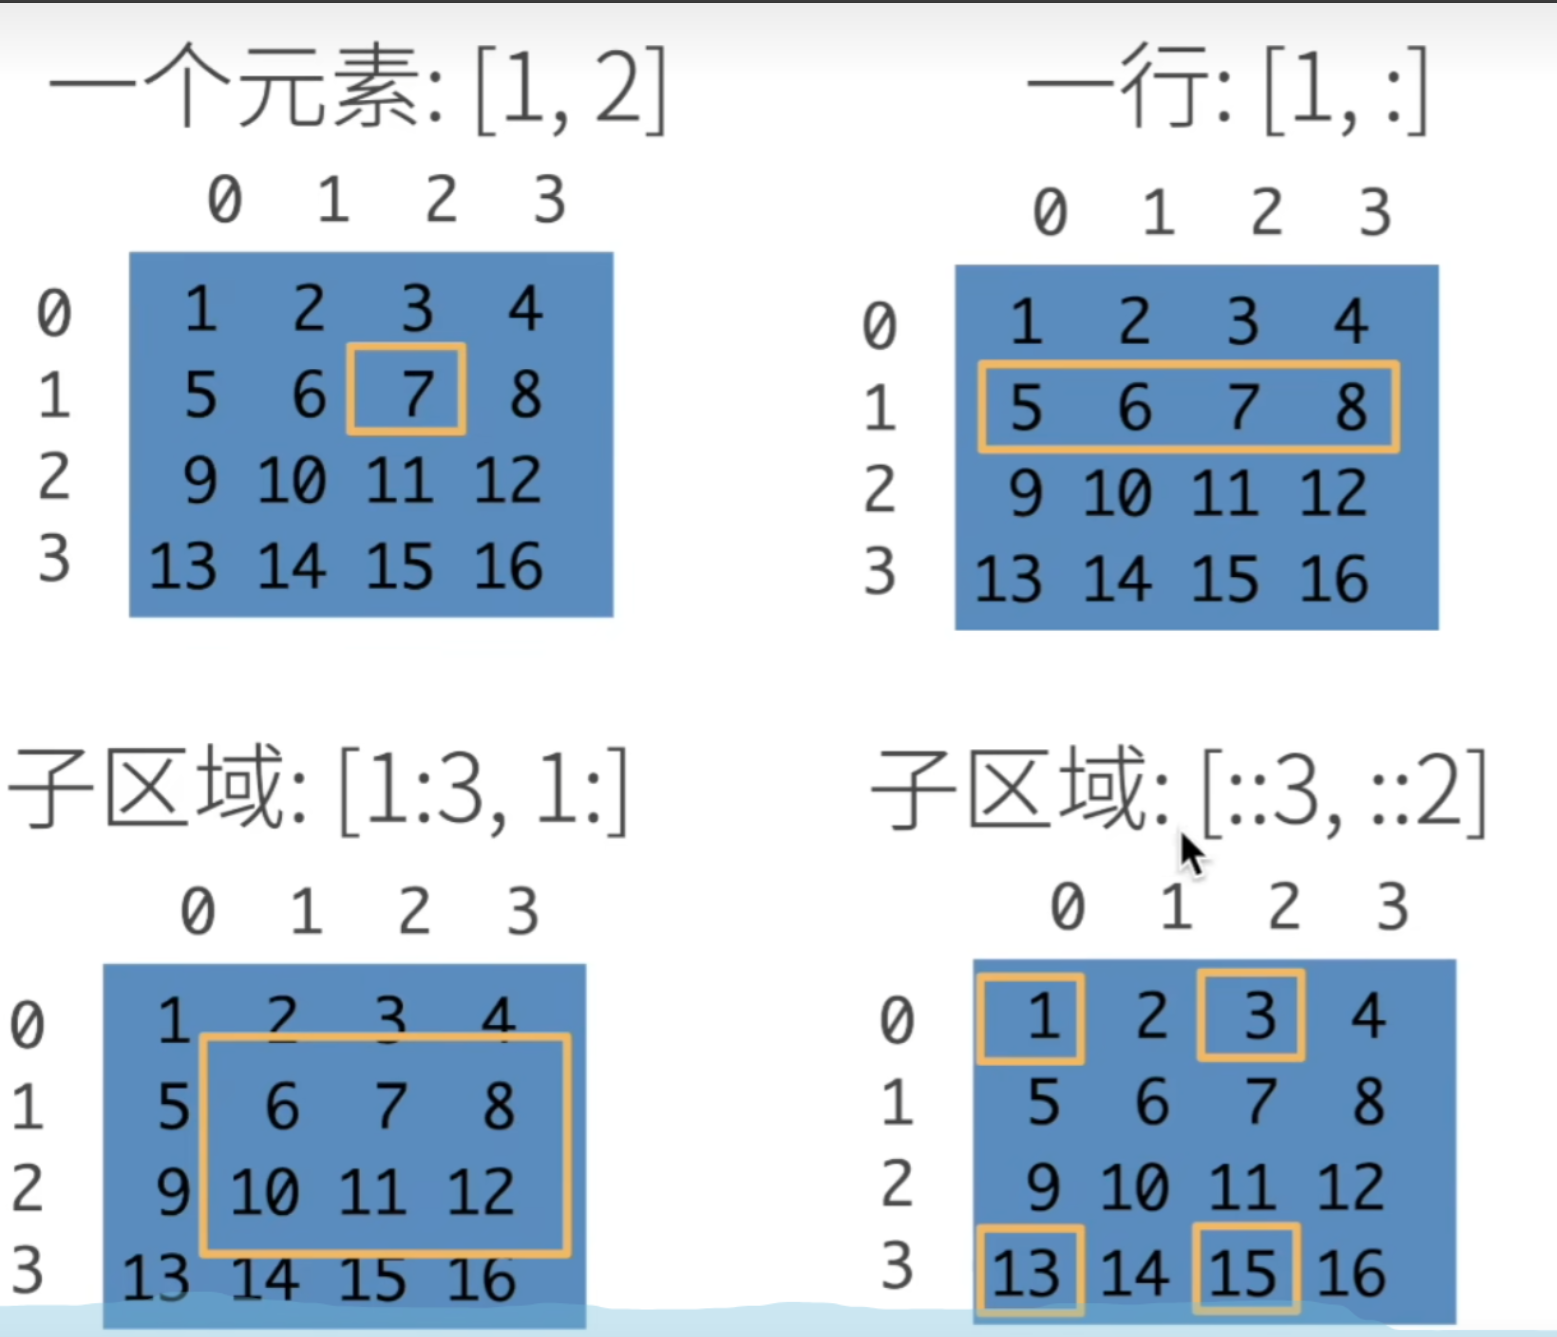


**行的索引和列的索引都是从零开始的。而且左闭右开，start:end有start无end 如1:3那么就是1和2，如果是[1:3,1:]后面表示列的索引是从1包含1到最后，此时不考虑有start无end**

**同理带步长的切片[start:end:step] ::3意思start和end都省略了，表示从0行到最后一行，每隔3行取一个，因此[::3,::2]等价于从0行到最后一行。从0列到最后一列，步长分别为3和2，也就是取0行、第3行、第0列、第2列**


In [13]:
import torch
x= torch.arange(12)#我们可以使用 arange 创建行向量 x
#这个行向量包含以0开始的前12个整数
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [14]:
x.shape

torch.Size([12])

In [15]:
x.numel()

12

In [19]:
x= x.reshape(3,4)#要想改变一个张量的形状而不改变元素数量和元素值，
#可以调用reshape函数。] 例如，
#可以把张量x从形状为（12,）的行向量转换为形状为（3,4）的矩阵
x

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

## 注意顺序是（C,H,W）第一个是layers，也就是通道再* 长度*宽度

In [21]:
torch.zeros((2,3,4))#output两个矩阵代表两层

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [25]:
#同理
torch.ones((2,3,4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [26]:
#通过提供包含数值的Python列表(或嵌套列表)来为所
#需张量中的每个元素赋予确定值
torch.tensor([[2,1,4,3],[1,2,3,4],[4,3,2,1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

* 注意是有（）括号 同时也有两个[[1,2,3],[3,4,9],[2,9,3]]用来表示 **二维矩阵**

In [31]:
#生成数据的附加操作
x = torch.arange(12,dtype=torch.float32).reshape((3,4))
y = torch.tensor([[2.0,1,4,3],[1,2,3,4],[4,3,2,1]])
#合并的指令
resultdim0= torch.cat((x,y),dim=0)
resultdim1= torch.cat((x,y),dim=1)
print("x:")
print(x)
print("\ny:")
print(y)
print("\ntorch.cat((x, y), dim=0):")
print(resultdim0)
print("\ntorch.cat((x, y), dim=1):")
print(resultdim1)

x:
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

y:
tensor([[2., 1., 4., 3.],
        [1., 2., 3., 4.],
        [4., 3., 2., 1.]])

torch.cat((x, y), dim=0):
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [ 2.,  1.,  4.,  3.],
        [ 1.,  2.,  3.,  4.],
        [ 4.,  3.,  2.,  1.]])

torch.cat((x, y), dim=1):
tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
        [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
        [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]])


# 理解拼接的概念 torch.cat((x,y),dim=0)可想象为行拼接  
# 也就是 【2,1,2,3】
 -------下面接着拼接就是dim=0----------
# 这里就是【2,4,5,3】 egs below  
* 1  2  3     <-- A 的第一行
* 4  5  6     <-- A 的第二行
* 7  8  9     <-- B 的第一行
* 10 11 12    <-- B 的第二行

# 同理dim=1意思为列方向的拼接
* 1 2  3 || 07   08   09     <-- A 的第一行 + B 的第一行
* 4  5  6 || 10 11 12    <-- A 的第二行 + B 的第二行

In [32]:
#按照逻辑运算符构建tensor 张量
x == y  #输出结果为true的地方证明元素相等，false的地方证明不相等 

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [34]:
#对张量中的所有元素进行求和会产生一个只有一个元素的张量。
x.sum()

tensor(66.)

In [36]:
a = torch.arange(3).reshape((3,1))
b = torch.arange(2).reshape((1,2))
a,b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [37]:
a+b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

**省内存的写法，原地操作**
z[:]=x+y   或者 x+=y
因为普通的赋值y-y+x会占用新的内存

# 
翻译官 numpy与tensor 以及 ‘ . ’ 是什么意思
 ‘ . ’的意思就好比技能
  史蒂夫.血量   史蒂夫.攻击力
import torch
x = torch.tensor([1,2,3]) <--这是一个张量

**但是很多时候都只认识numpy的数组 因而需要转化 没办法直接输出、画图等 因为tensor的帽子有一堆没用的**
* 用x的numpy技能 也就是 * n=x.numpy()来解决！

# .item的重要用法---“拆快递”
PyTorch为了能自动求导，哪怕只是一个数字5，也会把它装Tensor的盒里
### 张量 vs 纯数字的直观类比
| 形式 | 含义 | 形象理解 |
|------|------|----------|
| `tensor(5)` | PyTorch 张量对象 | 📦 这是一个**盒子**，盒子里装了数字 5（包含额外的张量属性：数据类型、设备、梯度等） |
| `5` | Python 原生数字 | 🔢 这是数字 5 **本身**（仅表示数值，无额外属性） |

#### 补充说明
- 张量 `tensor(5)` 就像带标签的快递盒：除了里面的“物品（数值5）”，还有“快递单（属性）”（比如 `dtype=torch.int64`、`device=cpu` 等）；
- 纯数字 `5` 就像裸的物品：只有数值本身，没有任何附加信息。

* 直接接loss = torch.tensor（3.5）是不对的！ 因为还有其他的一堆信息

## 那么如果需要打印loss 就只有用技能.item（）
- print(loss.item()) 而并不是用print（loss）

## torch.tensor() 穿上pytorch能用的张量
- import numpy as np  

- data= [1,2,3]
- print(x)
* #输出: tensor([1, 2, 3])*